In [44]:
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt

import cv2
from cv2 import IMREAD_GRAYSCALE, IMREAD_UNCHANGED

In [20]:
df = pd.read_csv("data/train.csv")

In [21]:
df.head()

,ImageId,MaskId
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg


In [22]:
df.columns = df.columns.str.lower()

In [23]:
df["path_mask"] = "data/masks/masks/" + df["maskid"]

In [24]:
df.sample()

,imageid,maskid,path_mask
15565,ID00411637202309374271828_201.jpg,ID00411637202309374271828_mask_201.jpg,data/masks/masks/ID00411637202309374271828_mas...


In [48]:
df.shape

(16708, 4)

In [49]:
# ставлю метку где маска занимает более 99% картинки 
count = 0
mask_50 = []
for i in df.iterrows():
    path = i[1][2]
    mask = cv2.imread(path, IMREAD_GRAYSCALE)
    mask1 = np.concatenate(mask)
    mask1 = mask1/255
    size = (mask1).sum() / len(mask1) * 100
    if size > 99:
        mask_50.append(mask)
        df.loc[df.index == i[0], 'count_1'] = 1
        count += 1
count

0

<function matplotlib.pyplot.show(close=None, block=None)>

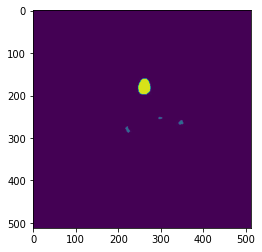

In [45]:
plt.imshow(mask)
plt.show

In [37]:
mask1 = np.concatenate(mask)
mask1.shape

(262144,)

In [42]:
mask1.sum()/ len(mask1) * 100

27.34375